In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

#### Ejercicio:

Compare las distribuciones estimadas de las muestras obtenidas mediante
muestreo por rechazo, contra las distribuciones del posterior que se
conocen por inferencia Bayesiana exacta.

Accepted 0.016


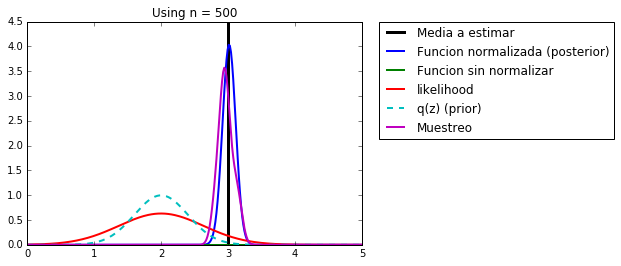

Accepted 0.012


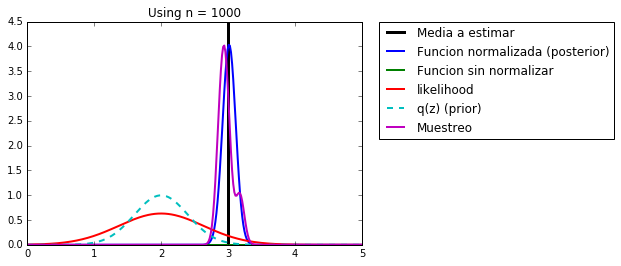

Accepted 0.00965


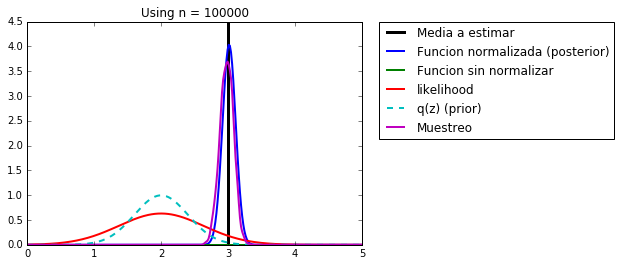

In [140]:
mu = 3
var = 0.5
sig = np.sqrt(var)
N = 50
y = rd.normal(mu, sig, N)

mu0 = 2
sig0 = 0.4

# Estimation of mean with knonw variance
# Use a gaussian conjugate prior
def posterior(mu0, s20, s2, X, n):
    muml = np.sum(X[0 : n]) / n
    mun = (s2 * mu0 / (n * s20 + s2)) +  n * s20 * muml / (n * s20 + s2)
    sign = 1.0 / ((1.0 / s20) +  (n / s2))
    return mun, sign

muk, sigk = posterior(mu0, sig0, var, y, len(y))


def fun(mu, sigu):
    N = len(y)
    a = 1.0 / ((2.0 * np.pi * sigu) ** (N / 2.0))
    b = -np.sum((y - mu) ** 2) / (2.0 * sigu)
    c = a * np.exp(b)
    return c

fun_vec = np.vectorize(fun)
    
def comp_k(y):
    # Params given by maximum likelihood
    N = len(y)
    muML = np.sum(y) / N
    return fun(muML, var)
    

# k = comp_k(y)
# print ("K using ML", k)
# k = 0.05
   
def q(z):
    return norm.pdf(z, mu0, sig0)

def draw_q(n):
    return rd.normal(mu0, sig0, size=n)

def pt(z):
    return fun_vec(z, sig) * q(z)

def likelihood(z):
    return norm.pdf(z, mu0, np.sqrt(sig0))
    

def uni(N):
    return rd.uniform(0, 1, size=N)

# vec_uni = np.vectorize(uni)

def reject(N):
    samples = draw_q(N)
    u = uni(N)
    s = np.array(samples)
    muML = np.sum(y) / len(y)
    prob = fun_vec(s, var) / fun_vec(muML, var)
    valid = []
    for i in range(N):
        if (u[i] <= prob[i]):
            valid.append(samples[i])
    print ('Accepted', len(valid) / float(N))
    return valid

def esti2(N):
    samples = reject(N)
    return stats.gaussian_kde(samples)


x = np.linspace(0, 5, 300)

Nexp = [500, 1000, 100000]
def pz(z): # Posterior
    return norm.pdf(z, muk, np.sqrt(sigk))

# print ('K', k)
for n in Nexp:
    plt.axvline(x=mu, color='k' ,label='Media a estimar', linewidth=3)
    # plt.plot(x, norm.pdf(x, mu, sig), label = 'Funcion datos reales')
    plt.plot(x, pz(x), label='Funcion normalizada (posterior)', linewidth=2)
    plt.plot(x, pt(x), label='Funcion sin normalizar', lw=2)
    plt.plot(x, likelihood(x), label='likelihood', lw=2)
    plt.plot(x, q(x), '--',label='q(z) (prior)', lw=2)
    # plt.plot(x, k * q(x), '--',label='K * q(z)', lw=2)
    kernel = esti2(n)
    sampling = kernel(x)
    plt.plot(x, sampling, label='Muestreo', lw=2)
    plt.title("Using n = %d" % (n))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
